# Dealing with Real Data

We will always begin our scripts by importing all the necessary modules

In [88]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.plotly as py
import pylab
import scipy

from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
from plotly.graph_objs import *

py.sign_in('theasi', 'dzo58800at')

%matplotlib inline

Load the breast cancer dataset from the file wdbc.csv

In [89]:
wdbc = pd.read_csv('wdbc.csv', sep=',')

The breast cancer dataset is now stored in a pandas dataframe. Its name is "wdbc" unless you have changed it. If you are new to Pandas, think of it as an excel table with column headers. It acts a bit like an in-memory relational database.  

In general, when dealing with a very large excel table, there is no advantage to displaying the entire table on the screen, and it's a computationally expensive task. It is however useful to view the first few lines (the head) of the file, just to help you visualise what's going on. To do so, run the next cell. 

In [90]:
wdbc.head()

,ID number,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Running the next cell gives you the dimensions or "shape" of the dataframe


In [91]:
wdbc.shape

(569, 32)

At this point, it is worth thinking about what the data is actually telling us. You should have seen when you looked at the head that most of the columns are referring to some physical measurement (Radius, Perimeter, Area etc.). The data in fact is measurements of various physical properties of tumours. The 2nd column is special, it tells us whether that particular tumour was in fact diagnosed to be malignant ("M") or benign ("B").

In machine learning terms, the 2nd column, named <i>Diagnosis</i>, contains the "label" or "target". All of the subsequent columns contain the "features". Many problems in machine learning boil down to being presented with data of this form and developing a model which when given another data point consisting of these same features, can predict its label. 

The next step simply seeks to extract information from the dataframe `wdbc` such that we have two arrays, one which is `N x M` and one which is `M x 1` in which N is the number of features (30) and M is the number of samples. The N x M array is the array of features and the M x 1 array is the array of labels/classifiers. Note that we simply throw the first column which contains the tumour identifier away. One wouldn't expect the tumour's ID number in the system to be in any way predictive of whether or not it's harmful.

In [92]:
#convert wdbc to a numpy array
dataArray = np.array(wdbc)
#[2:32] is "slice notation" meaning 2(inclusive)-32(not inclusive)
header = wdbc.columns[2:32]
#casting all data as floats makes sure that none of the data is in a non desirable form such as a string
#X is the feature array
X = dataArray[:, 2:32].astype(np.float)
#y is the array of labels
y = dataArray[:, 1]

First, let's get a feel for how many tumours were malignant and how many benign. There's a useful function in numpy (which is helpfully called "unique") which given an array returns all of the unique entries in that array. E.g. `np.unique([1,2,2,1,3])` will return `[1,2,3]`. Furthermore, one call optionally specificy to return the number of times each of these unique entries occurs. `np.unique([1,2,2,1,3],return_counts=True)` will return `([1,2,3],[2,2,1])`. 



If instead you would prefer the output format to give you [[1,2],[2,2],[3,1]] you can manually 'zip' together the values and the counts to get [[value1, count1],[value2, count2],...]:

`a = np.unique([1,2,2,1,3], return_counts=True)`
<br>
`print(zip(a[0],a[1]))`

This will take the array [1,2,2,1,3] and return [[1,2],[2,2],[3,1]]



Plot y frequencies: 

The unique diagnoses are ['B' 'M']
Which Occur [357 212] times respectively


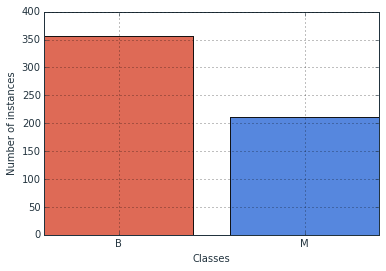

In [93]:
freq = np.unique(y, return_counts=True)

print "The unique diagnoses are",freq[0]
print "Which Occur",freq[1],"times respectively"

#freq[0] contains the actual labels and freq[1] the number of occurences. 
# Leading on from the above side, experiment with printing out zip(freq[0],freq[1])

bar_labels = freq[0]
x_pos = np.array(range(len(bar_labels)))
#Make a bar plot visualising how many benign and malignant diagnoses are contained within the data set
plt.bar(left=0, height=int(freq[1][0]), color='#db5a44', align='center', alpha=0.9)
plt.bar(left=1, height=int(freq[1][1]), color='#447adb', align='center', alpha=0.9)
plt.xticks(x_pos, bar_labels)
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.grid()

Next, let's make a scatter plot of the first two features namely Texture and Radius. 

First, let's think about how X is indexed. We know there are 30 features. Try printing out X[17,36]. You should get that index 36 is out of bounds. 36 is greater than the number of features, but far smaller than the number of samples. This should convince you that if you want to know about the nth feature of the mth tumour, you need to look at X[m,n] (clearly there's nothing fundamental about this, this is just how we have set the problem up. It's always worth testing this just to make sure)

Now that we've dropped *ID number* and *Diagnosis* from the dataset to get at our list of features, *Radius* and *Texture* are our first two features (consequently, they are features number 0 and 1). If you want to get all of the Radius measurements into an array, the simple way to do this would be to write `radius = X[:,0]` and similarly `texture = X[:,1]` in which the semi-colon signifies "all values". Remember we have actually saved the names of all of the features in an array called header. Thus if we want to conveniently create n (n=number of features) each containing all of the readings for a single feature, we could write
`feature_array = [X[:,j] for j in range(len(header))]`. This in essence gives us the transpose of X, but it means that X[n] gives us all the readings for feature n, rather than measurement n, which in most contexts is more useful.

A useful trick for visualising data is to use a color map. In this case, we have 569 data readings for both texture and radius. Each of these tumours can be either benign or malignant. Wouldn't it be nice to have a scatter plot in 2d with the x-y axes representing texture and radius, and the colour of the point signifying whether or not the tumour was malignant? 

A convenient way of doing this is to have the two arrays which give the radius and texture measurements as described above, and another containing the tumour labels. Of couse we have this already, it's the array `y`. y however contains entries 'M' and 'B'. Python's colour mapping however requires you to give it numbers. An easy map is to simply create a new array (called color map below) in which `1` signifies a malignant tumour and `0` a benign one. 

The syntax used for the scatter plot is hopefully somewhat intuitive: `scatter(x value, y value, colour, (optional colour map))`
Of course, you can set colour (don't forget the American spelling 'color') equal to 'b' for blue, but if you want the colour to vary, pass it another array (in this case, color_map) and then use one of matplotlib's inbuilt colour maps. 

Examples of colour maps other than the fairly standard 'bwr' can be found at:
http://matplotlib.org/examples/color/colormaps_reference.html

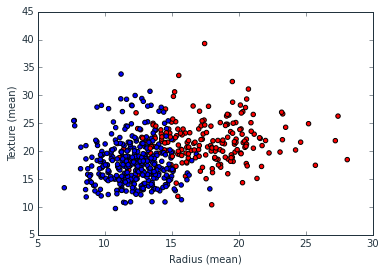

In [94]:
#For now, consider only radius and texture
radius = X[:,0]
texture = X[:,1]


color_map = [1 if label=='M' else 0 for label in y]

plt.scatter(radius,texture,c=color_map,cmap='bwr')
plt.xlabel(header[0])
plt.ylabel(header[1])
plt.legend(loc='upper right')
plt.show()

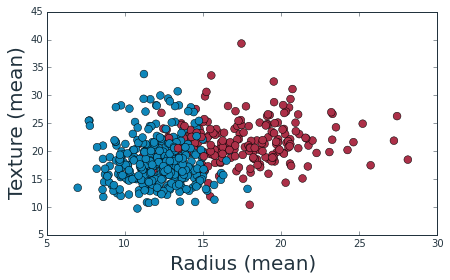

In [114]:
# Code for MOOC plots

# define various sizes for all plots
paramSet = {'big': {'fsize': 12, 'labelsize': 20, 'figsize': (14,8), 'markersize': 80, 'lw':1},
           'small': {'fsize': 10, 'labelsize': 16, 'figsize': (5,3), 'markersize': 40, 'lw':0.5},
            '3D': {'fsize': 12, 'labelsize': 20, 'figsize': (12,8), 'markersize': 120, 'lw':1},
           'medium2D': {'fsize': 12, 'labelsize': 20, 'figsize': (7,4), 'markersize': 60, 'lw':0.5},
           'medium3D': {'fsize': 12, 'labelsize': 20, 'figsize': (7,4), 'markersize': 60, 'lw':0.5},
           
           }

curParam = paramSet['medium2D'] # pick one set of parameters
darkColor = '#22333E' # brand colors (dark)
colors = ['#0F87BA','#AC3048','#3AD4BD','#FFFF00'] # 3 brand colors (happy colors) + yellow by Gabi
fsize = 12
plt.rc('font', **{'family' : 'Proxima Nova Light', # Brand font
        'size'   : fsize})

lwidth = 1
plt.rc('axes',**{'labelcolor':darkColor,'edgecolor':darkColor})
plt.rc('xtick',**{'color':darkColor})
plt.rc('ytick',**{'color':darkColor})

plt.rcParams["figure.figsize"] = curParam['figsize']
#ts.plot(color=colors[0], label='ABC.L',lw=lwidth); 

#leg=plt.legend(prop={'size':fsize});
#for idx, text in enumerate(leg.get_texts()):
#    plt.setp(text, color = colors[idx])
#plt.ylabel('Stock price',size=20 )
#plt.xlabel('Date',size = 20 )

#For now, consider only radius and texture
radius = X[:,0]
texture = X[:,1]


color_map = map(lambda x: colors[x=='M'], y) #[1 if label=='M' else 0 for label in y]



plt.scatter(radius,texture,c=color_map,lw=curParam['lw'],s=curParam['markersize'])
plt.xlabel(header[0], size=curParam['labelsize'])
plt.ylabel(header[1], size=curParam['labelsize'])
plt.legend(loc='upper right', prop={'size':curParam['fsize']})
plt.show()

Also, it is worth investigating the three-dimensional scatterplot. Let's include the third feature, namely Perimeter.

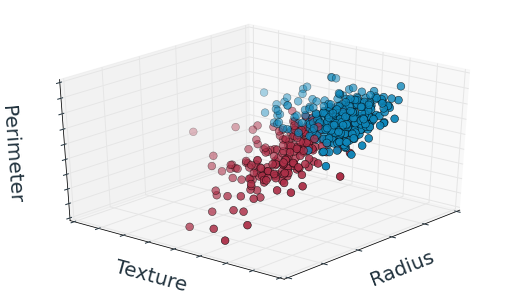

In [121]:
# more MOOC plotting (3D)
# %matplotlib qt
curParam = paramSet['medium3D']
perimeter=X[:,2]

fig = plt.figure(1, figsize=curParam['figsize'])

ax  = Axes3D(fig, elev=-150, azim=140)# <<< change these numbers to play with the viewing angle
fig.patch.set_alpha(0) # NECESSARY FOR TRANSPARENT GRAPH (or maybe just the one below)
ax.patch.set_alpha(0)  # NECESSARY FOR TRANSPARENT GRAPH
ax.scatter(radius, texture, perimeter, c=color_map, lw=curParam['lw'],s=curParam['markersize'])
ax.set_xlabel("Radius", size=curParam['labelsize'])
ax.set_ylabel("Texture", size=curParam['labelsize'])
ax.set_zlabel("Perimeter", size=curParam['labelsize'])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

Next, let's plot many different scatter plots in 2d. 

In principle, there are 30 choose 2 =435 distinct pair of features one could plot. Let's start by plotting 25 plots. Do this by choosing 2 sets of 5 features. If you choose [1,2,3,4,5] and [1,2,3,4,5] for example, you will get plots of 1v1, 1v2 (...) 1v5, 2v1, 2v2 etc. Play around with different combinations of features. The colour map is still set from before. 

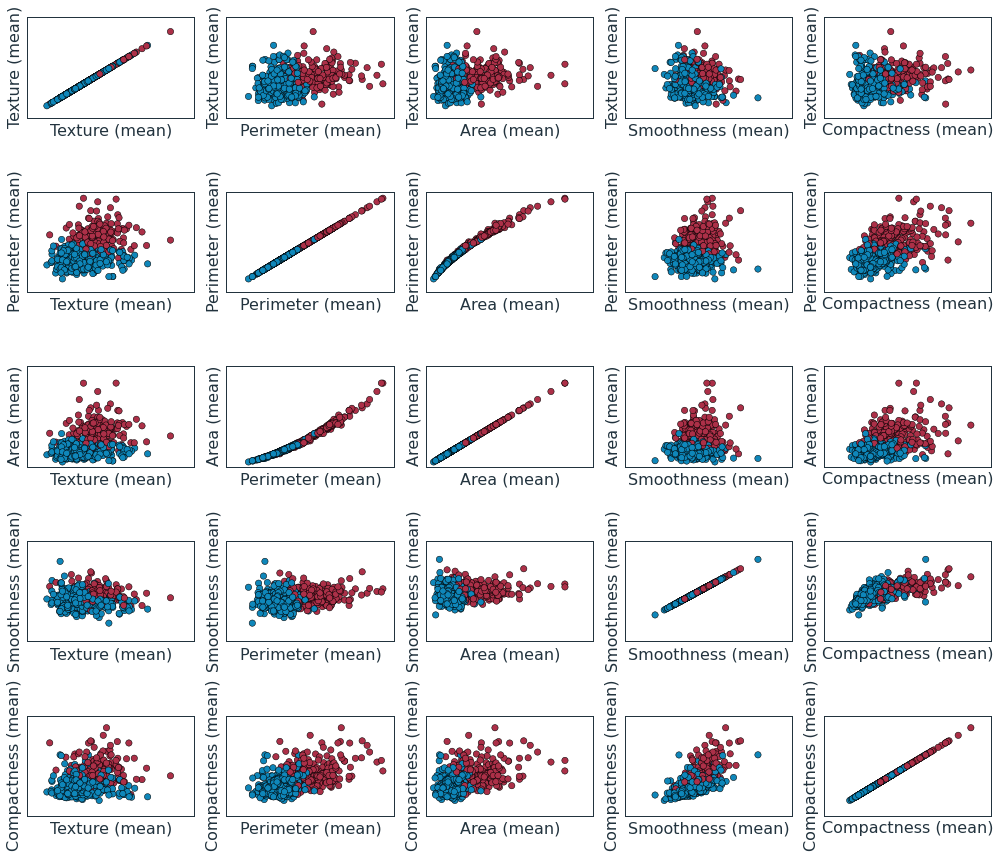

In [97]:
# final graph for MOOC
curParam = paramSet['small']
fig = plt.figure(figsize=(14,12))
feat_comb_1 = [1,2,3,4,5]
feat_comb_2 = [1,2,3,4,5]
#This next line was alluded to above, it essentially gives the transpose of X
feature_array = [X[:,j] for j in range(len(header))]

nfeat = len(feat_comb_1)

for j in xrange(nfeat):
    for k in xrange(nfeat):
        #subplot takes 3 arguments. 
        # If the final plot is going to be 4 subplots x 4 subplots for example, 
        # both of these arguments must be equal to 4. 
        # The third argument should be incremented sequentially and matplotlib will then decide, for example
        # that in the case of a 5x5 matrix of plots, the 9th plot should be in the 4th plot on the second row
        plt.subplot(nfeat, nfeat, j + 1 + k * nfeat)
        plt.scatter(feature_array[feat_comb_1[j]], feature_array[feat_comb_2[k]], c=color_map, lw=curParam['lw'],s=curParam['markersize'])
        plt.xlabel(header[feat_comb_1[j]], size=curParam['labelsize'])
        plt.ylabel(header[feat_comb_2[k]], size=curParam['labelsize'])
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        fig.tight_layout()
        

## Descriptive Statistics and Exploratory Visualisation

Retrieve useful statistics and information about the dataset under study such as the "five-number summary" (median, min, max, lower and upper quartile)

In [98]:
wdbc.describe()

,ID number,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Let's visualise these descriptive statistics using interactive boxplots provided by the plotly library. Try to play around with the interactive features of plotly (zoom and hover functionality, etc.)

In [99]:
nrow, ncol = X.shape

# Make list of Box traces
traces = [
    Box(
        y=X[:,i],
        name=header[i] 
    ) 
    for i in range(ncol)
]

# Make Data object 
data = Data(traces)

# Make the Layout 
layout= Layout(showlegend=False, margin=Margin(b=170, t=50), xaxis=XAxis(title='Features'), yaxis=YAxis(title='Value'))

# Make figure object
fig = Figure(data=data, layout=layout)

# Send to Plotly and show plot in notebook
py.iplot(fig, filename='boxplot_raw')

Or with the default function for static representation:

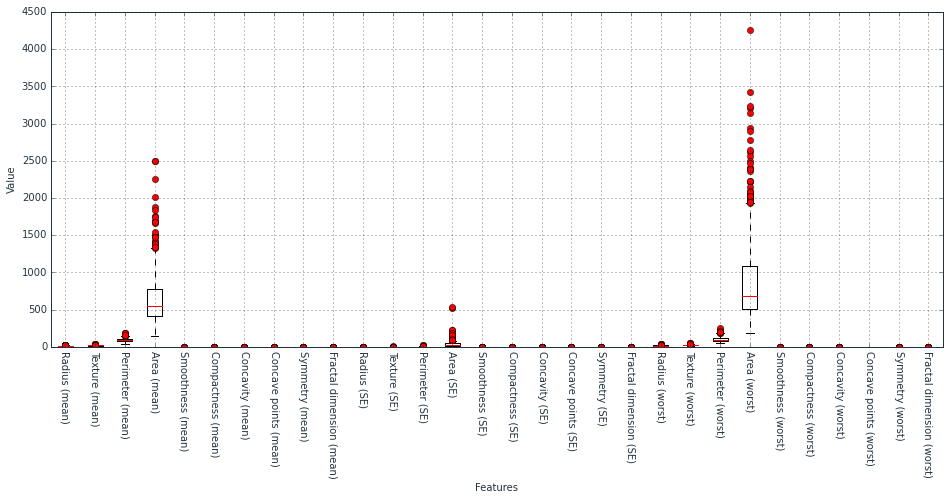

In [100]:
fig, axes = plt.subplots(figsize=(16,6))
bp = plt.boxplot(X)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.xlabel('Features')
plt.ylabel('Value')
axes.set_xticklabels(header, rotation=270)
plt.grid()

## Pre-processing with Principal Component Analysis

Often when dealing with real data, it is instructive to normalise it.

For example, if we are looking at one feature whose mean is 100 and another whose mean is 0.0001, it is difficult to compare a measurement of these two features. Furthermore, if you look at some of the maths behind PCA, it relies on all feature values being expressed such that their means are zero. 

Python's preprocessing module can transform the data, meaning we don't have to go through the arduous steps of calculating the mean and standard deviation and then applying the transformation manually. Whether you want to normalise in the sense that the mean in all features is zero, the variance is unity, or both, all of these options are available by setting the optional arguments: "with_mean=True/False" and  "with_std=True/False" as required. For more information, see http://scikit-learn.org/stable/modules/preprocessing.html



In [101]:
scaler  = preprocessing.StandardScaler().fit(X)
#Xscaled is now the transformed data
Xscaled = scaler.transform(X)

Retrieve the mean values per column: 

In [102]:
scaler.mean_ 

array([  1.41272917e+01,   1.92896485e+01,   9.19690334e+01,
         6.54889104e+02,   9.63602812e-02,   1.04340984e-01,
         8.87993158e-02,   4.89191459e-02,   1.81161863e-01,
         6.27976098e-02,   4.05172056e-01,   1.21685343e+00,
         2.86605923e+00,   4.03370791e+01,   7.04097891e-03,
         2.54781388e-02,   3.18937163e-02,   1.17961371e-02,
         2.05422988e-02,   3.79490387e-03,   1.62691898e+01,
         2.56772232e+01,   1.07261213e+02,   8.80583128e+02,
         1.32368594e-01,   2.54265044e-01,   2.72188483e-01,
         1.14606223e-01,   2.90075571e-01,   8.39458172e-02])

Retrieve the std values per column:

In [103]:
scaler.std_       

C:\Anaconda\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning:

Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead



array([  3.52095076e+00,   4.29725464e+00,   2.42776193e+01,
         3.51604754e+02,   1.40517641e-02,   5.27663291e-02,
         7.96497253e-02,   3.87687325e-02,   2.73901809e-02,
         7.05415588e-03,   2.77068942e-01,   5.51163427e-01,
         2.02007710e+00,   4.54510134e+01,   2.99987837e-03,
         1.78924359e-02,   3.01595231e-02,   6.16486075e-03,
         8.25910439e-03,   2.64374475e-03,   4.82899258e+00,
         6.14085432e+00,   3.35730016e+01,   5.68856459e+02,
         2.28123569e-02,   1.57198171e-01,   2.08440875e-01,
         6.56745545e-02,   6.18130785e-02,   1.80453893e-02])

Draw a boxplot for the transformed (centered and scaled) data using once more the plotly library

In [104]:
# Make list of Box traces
traces = [
    Box(
        y=Xscaled[:,i],
        name=header[i] 
    ) 
    for i in range(ncol)
]

# Make Data object made up of 15 Box object 
data = Data(traces)

# Make the Layout 
layout= Layout(showlegend=False, margin=Margin(b=170, t=50), xaxis=XAxis(title='Features'), yaxis=YAxis(title='Value'))

# Make figure object
fig = Figure(data=data, layout=layout)

# Send to Plotly and show plot in notebook
py.iplot(fig, filename='boxplot_scaled')

Or with the default function for static representation:

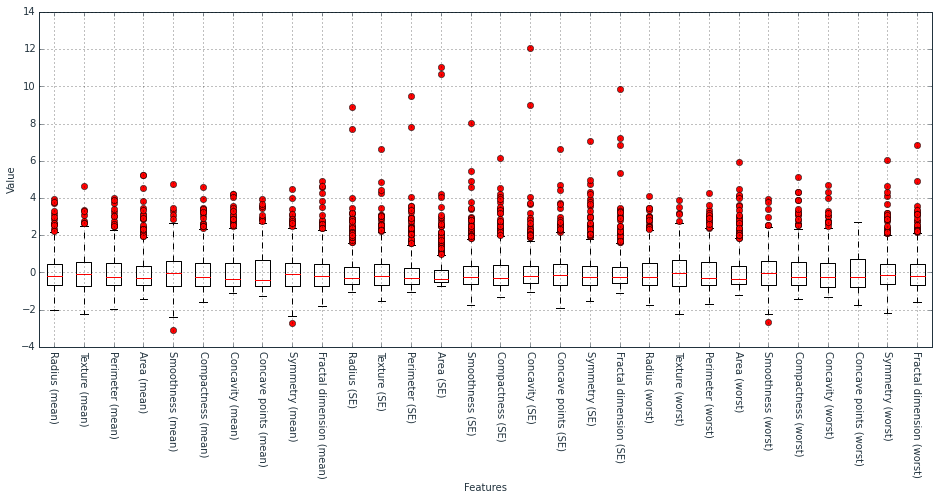

In [105]:
fig, axes = plt.subplots(figsize=(16,6))
bp = plt.boxplot(Xscaled)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.xlabel('Features')
plt.ylabel('Value')
axes.set_xticklabels(header, rotation=270)
plt.grid()

## Principal Component Analysis

Correlation coefficient

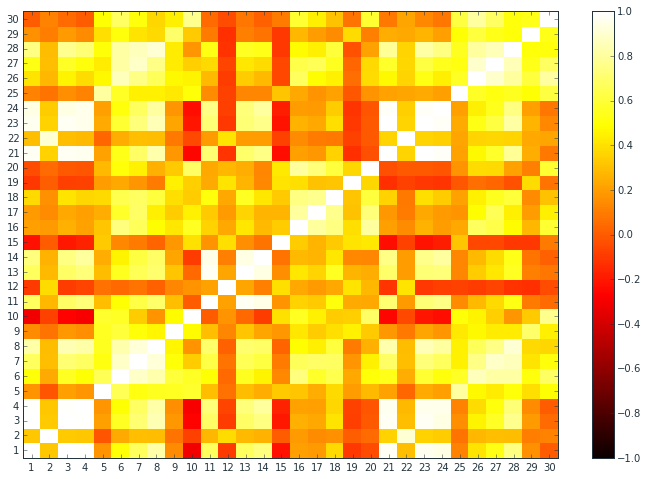

In [106]:
fig = plt.figure(figsize=(12,8))
#Numpy contains the function corrcoef which allows you to calculate the NxN correlations matrix of an NxM feature matrix. 
#Note that diagonal entries give you the variance of that feature
correlationMatrix = np.corrcoef(Xscaled, rowvar=0)
#A nice way to visualise the correlations matrix is to make a scatterplot and rather than write values, assign a colour map
plt.pcolor(correlationMatrix, cmap = 'hot', vmin=-1, vmax=1)
plt.colorbar()

# put the major ticks at the middle of each cell
plt.yticks(np.arange(0.5, 30.5), range(1,31))
plt.xticks(np.arange(0.5, 30.5), range(1,31))

plt.show()

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. The PCA function conducts a linear dimensionality reduction using Singular Value Decomposition (SVD) of the data and keeps only the most significant singular vectors to project the data to a lower dimensional space. The parameter n_components determines the number of Principal Components (PCs) to keep. In this case, we use the default case where all components are kept

In [107]:
desired_components=3 # project from 32 to 3 dimensions. What this means, is that we select the 3 dimensions of highest variance
pca = PCA(n_components = desired_components)
Xscores = pca.fit(Xscaled).transform(Xscaled)

# We can verify the number of principal components in this case
Xscores.shape

(569L, 3L)

We can plot the first two Principal Components using the PC scores

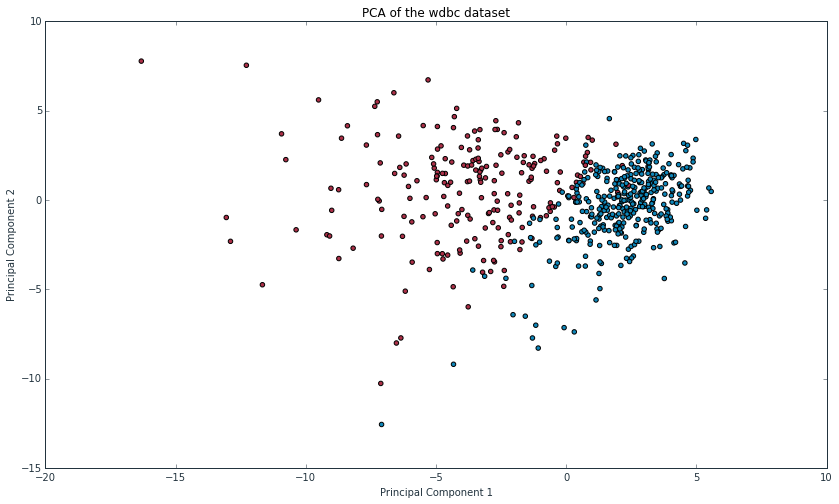

In [108]:
principle_component_data=[Xscores[:,i] for i in range(desired_components)]

plt.scatter(principle_component_data[0],principle_component_data[1],c=color_map,cmap='bwr')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the wdbc dataset')
plt.show()

Or in a three-dimensional space as follows

[]

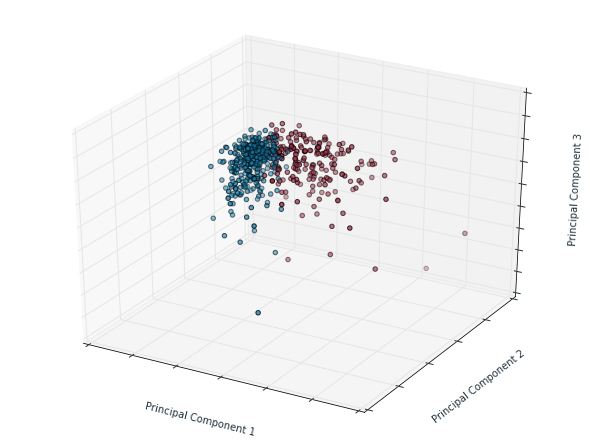

In [109]:
fig = plt.figure(figsize=(8,6))

ax = Axes3D(fig, elev=-150, azim=60)#play with the viewing angle by changing these numbers
ax.scatter(principle_component_data[0], principle_component_data[1], principle_component_data[2], c=color_map, cmap = 'bwr_r')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.w_zaxis.set_ticklabels([])

We can do the same as before in terms of plotting multiple scatter plots on the same axis. Keeping only the first few principle components as specified above by the number "desired_components", plot all possible (desired_components chose 2) scatter plots:

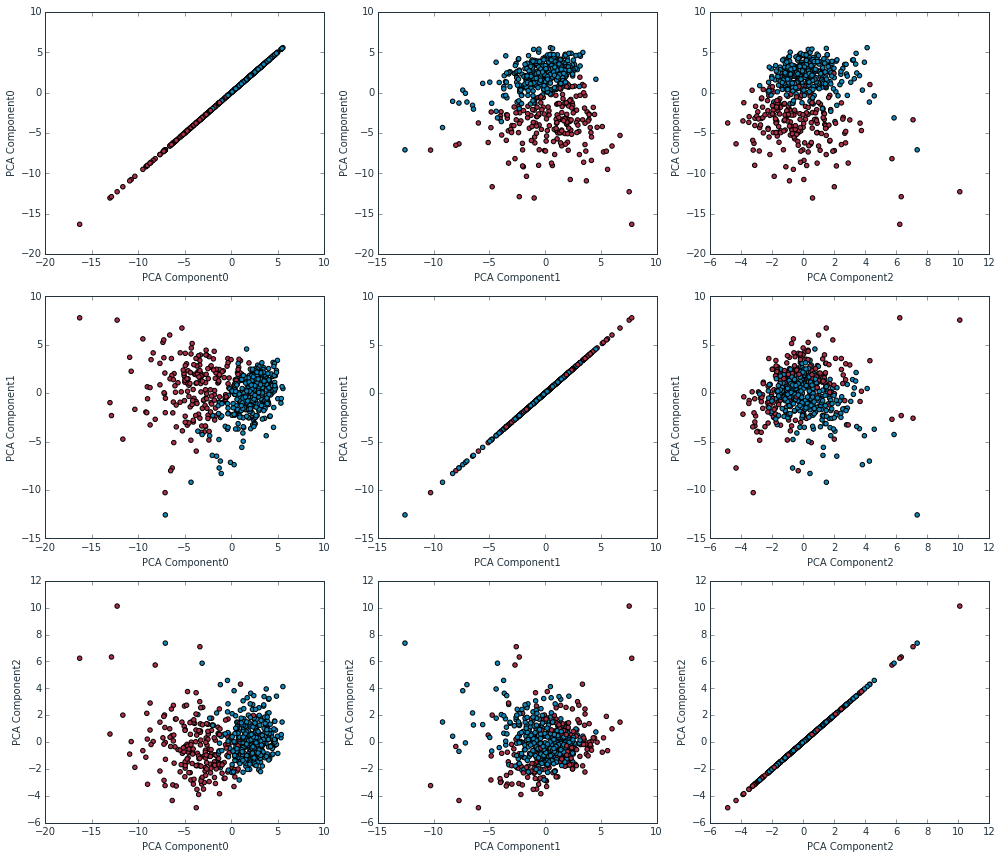

In [110]:
fig = plt.figure(figsize=(14,12))

for j in range(desired_components):
    for k in range(desired_components):
        plt.subplot(desired_components, desired_components, j+1+k*desired_components)
        plt.scatter(principle_component_data[j], principle_component_data[k], c=color_map,cmap='bwr')
        plt.xlabel("PCA Component%d"%j)
        plt.ylabel("PCA Component%d"%k)
fig.tight_layout()

From the above plots, it should become apparent that principle component number 1 has a huge amount of predictive power itself.

But how much information have we lost? We can figure this out by looking at the variance:

In [111]:
pca = PCA().fit(Xscaled)
pca.explained_variance_ratio_

array([  4.42720256e-01,   1.89711820e-01,   9.39316326e-02,
         6.60213492e-02,   5.49576849e-02,   4.02452204e-02,
         2.25073371e-02,   1.58872380e-02,   1.38964937e-02,
         1.16897819e-02,   9.79718988e-03,   8.70537901e-03,
         8.04524987e-03,   5.23365745e-03,   3.13783217e-03,
         2.66209337e-03,   1.97996793e-03,   1.75395945e-03,
         1.64925306e-03,   1.03864675e-03,   9.99096464e-04,
         9.14646751e-04,   8.11361259e-04,   6.01833567e-04,
         5.16042379e-04,   2.72587995e-04,   2.30015463e-04,
         5.29779290e-05,   2.49601032e-05,   4.43482743e-06])

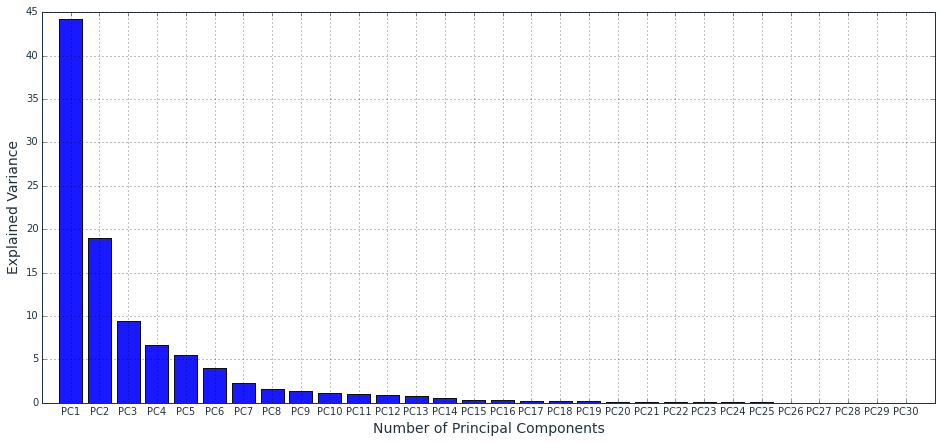

In [112]:
fig = plt.figure(figsize=(16,7))

bar_labels = ['PC%s' %i for i in range(1,ncol+1)]
bar_labels
x_pos = list(range(len(bar_labels)))
for i in range(ncol):
    plt.bar(left=i, height=pca.explained_variance_ratio_[i]*100, align='center', alpha=0.9)
plt.xticks(x_pos, bar_labels)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.xlim(-1, 30)
plt.grid()

Cumulative variance

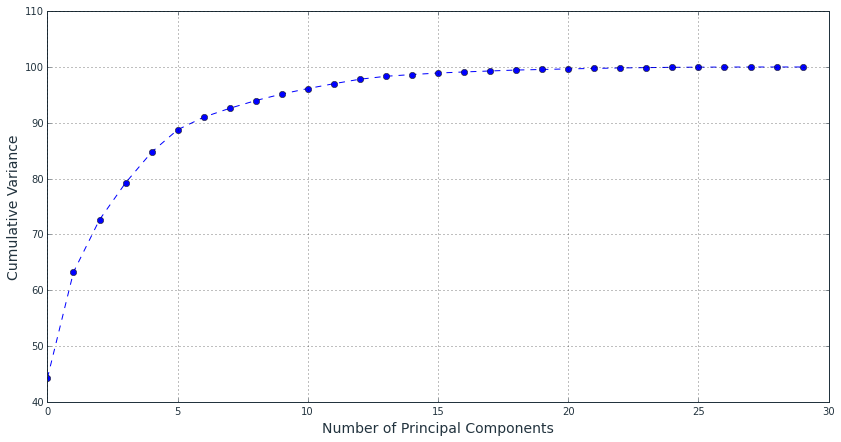

In [113]:
fig = plt.figure(figsize=(14,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_*100), '--bo')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Variance', fontsize=14)
plt.grid()